In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Cargar el conjunto de datos Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Mostrar la forma de los datos cargados
print(f'Train images shape: {train_images.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')


Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [6]:
# Cargar y preparar los datos de Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [7]:
# Definir el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

C:\Users\yjzabalam\.anaconda\Nueva carpeta\envs\curso_python\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:

# Entrenar el modelo con 10 épocas
model.fit(train_images[..., tf.newaxis], train_labels, epochs=10, batch_size=64, validation_data=(test_images[..., tf.newaxis], test_labels))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.7153 - loss: 0.7908 - val_accuracy: 0.8527 - val_loss: 0.4048
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8627 - loss: 0.3772 - val_accuracy: 0.8784 - val_loss: 0.3400
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8861 - loss: 0.3148 - val_accuracy: 0.8864 - val_loss: 0.3193
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9021 - loss: 0.2709 - val_accuracy: 0.8914 - val_loss: 0.3085
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9103 - loss: 0.2454 - val_accuracy: 0.8948 - val_loss: 0.2841
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9146 - loss: 0.2325 - val_accuracy: 0.9058 - val_loss: 0.2685
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9231 - loss: 0.2101 - val_accuracy: 0.9032 - val_loss: 0.2729
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9296 - loss: 0.1870 - val_acc

In [10]:
# Evaluar el modelo en el conjunto de datos de prueba
test_loss, test_accuracy = model.evaluate(test_images[..., tf.newaxis], test_labels)

print(f'Accuracy on test set: {test_accuracy}')
print(f'Loss on test set: {test_loss}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9070 - loss: 0.2802
Accuracy on test set: 0.9077000021934509
Loss on test set: 0.26723119616508484


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


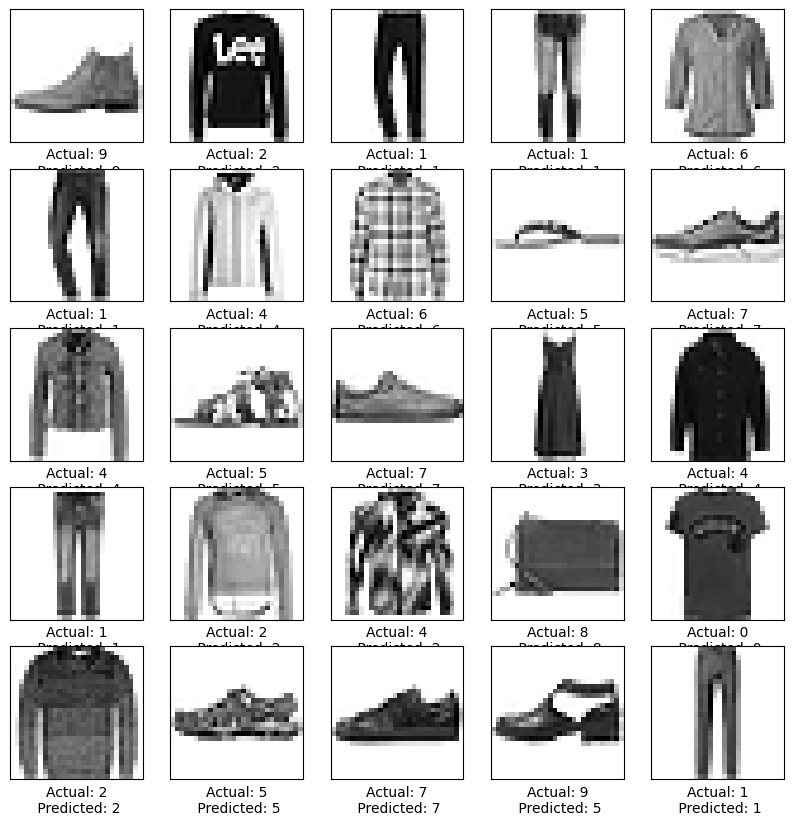

In [8]:
import numpy as np

# Hacer predicciones sobre el conjunto de datos de prueba
predictions = model.predict(test_images[..., tf.newaxis])

# Obtener las etiquetas predichas (clases con mayor probabilidad)
predicted_labels = np.argmax(predictions, axis=1)

# Mostrar algunas predicciones
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f'Actual: {test_labels[i]}\n Predicted: {predicted_labels[i]}')
plt.show()


In [9]:
# Cargar y preparar los datos de Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(_, _), (test_images, _) = fashion_mnist.load_data()
test_images = test_images.astype('float32') / 255.0


test_images = test_images[..., tf.newaxis]


In [10]:
# Definir el modelo
try:
    model = tf.keras.models.load_model('modelo.h5')  # Cargar el modelo desde el directorio actual
except Exception as e:
    print(f"Error al cargar el modelo: {e}")
    exit()


Error al cargar el modelo: [Errno 2] Unable to synchronously open file (unable to open file: name = 'modelo.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


In [11]:

from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Aplanar las imágenes de entrada de 28x28 píxeles
    layers.Dense(128, activation='relu'),  # Capa completamente conectada con 128 neuronas y activación ReLU
    layers.Dense(10, activation='softmax') # Capa de salida con 10 neuronas (una por cada clase) y activación softmax
])

# Mostrar la arquitectura del modelo
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compilar y entrenar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7822 - loss: 0.6252
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8594 - loss: 0.3886
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8745 - loss: 0.3424
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8844 - loss: 0.3140
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8914 - loss: 0.2948
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8982 - loss: 0.2765
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9010 - loss: 0.2695
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9043 - loss: 0.2570
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9118 - loss: 0.2422
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9099 - loss: 0.2354
